This project is ......

In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("FIFA 2018 Statistics.csv")

In [4]:
y=(data['Man of the Match']=='Yes')
feature_names=[i for i in data.columns if data[i].dtype in[np.int64]]
X= data[feature_names]

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_x,val_x,train_y,val_y=train_test_split(X, y, random_state=1)

In [9]:
tree_model=DecisionTreeClassifier(random_state=0,max_depth=5,
                                 min_samples_split=5).fit(train_x,train_y)

In [10]:
y_pred=tree_model.predict(val_x)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
cm = confusion_matrix(val_y,y_pred)
print(cm)
accuracy_score(val_y,y_pred)

[[ 9  7]
 [ 6 10]]


0.59375

In [16]:
y_pred

array([False,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False,  True,  True,  True, False])

In [17]:
val_y

121    False
104     True
55      True
56      True
33     False
118    False
122     True
35     False
31      True
51      True
108     True
103    False
4      False
67      True
102     True
48      True
46      True
59     False
92     False
106     True
125    False
2      False
53     False
116    False
110    False
113     True
80      True
44     False
99     False
54     False
83      True
17      True
Name: Man of the Match, dtype: bool

In [18]:
val_x

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
121,0,60,9,3,5,1,5,1,7,4,90,629,102,16,3,0,0,0
104,2,47,21,10,7,4,8,0,20,1,83,398,92,6,2,0,0,0
55,2,59,13,5,6,2,5,0,24,5,89,485,97,7,0,0,0,0
56,2,71,16,5,4,7,8,5,15,5,91,699,111,12,0,1,0,0
33,1,53,13,1,8,4,4,0,11,1,81,438,110,10,1,0,0,0
118,2,38,13,7,4,2,6,1,18,1,69,399,148,25,1,0,0,3
122,2,54,22,7,11,4,8,1,17,0,79,622,143,23,2,0,0,0
35,0,53,16,4,10,2,7,1,20,1,77,466,107,23,1,0,0,0
31,2,43,8,2,4,2,3,3,11,3,81,328,107,15,2,0,0,0
51,2,58,20,5,8,7,7,3,17,2,87,547,112,12,1,0,0,0


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
my_model=RandomForestClassifier(n_estimators=100,
                               random_state=0).fit(train_x,train_y)

In [21]:
y_pred=my_model.predict(val_x)

In [22]:
cm = confusion_matrix(val_y,y_pred)
print(cm)
accuracy_score(val_y,y_pred)

[[10  6]
 [ 4 12]]


0.6875

In [23]:
from eli5.sklearn import PermutationImportance

/home/rhyme/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/rhyme/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
perm=PermutationImportance(my_model, random_state=1).fit(val_x,val_y)

In [25]:
import eli5

In [26]:
eli5.show_weights(perm, feature_names=val_x.columns.tolist())

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


In [27]:
perm=PermutationImportance(tree_model, random_state=1).fit(val_x,val_y)

In [28]:
eli5.show_weights(perm, feature_names=val_x.columns.tolist())

Weight,Feature
0.1437 ± 0.1159,Goal Scored
0.0312 ± 0.0395,On-Target
0.0187 ± 0.0306,Distance Covered (Kms)
0.0063 ± 0.0729,Off-Target
0 ± 0.0000,Red
0 ± 0.0000,Ball Possession %
0 ± 0.0000,Blocked
0 ± 0.0000,Offsides
0 ± 0.0000,Goals in PSO
0 ± 0.0000,Saves


In [30]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [31]:
feature_to_plot='Distance Covered (Kms)'

In [34]:
pdp_dist=pdp.pdp_isolate(model=my_model,dataset=val_x,
                         model_features=feature_names,
                        feature=feature_to_plot)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': <AxesSubplot:xlabel='Distance Covered (Kms)'>})

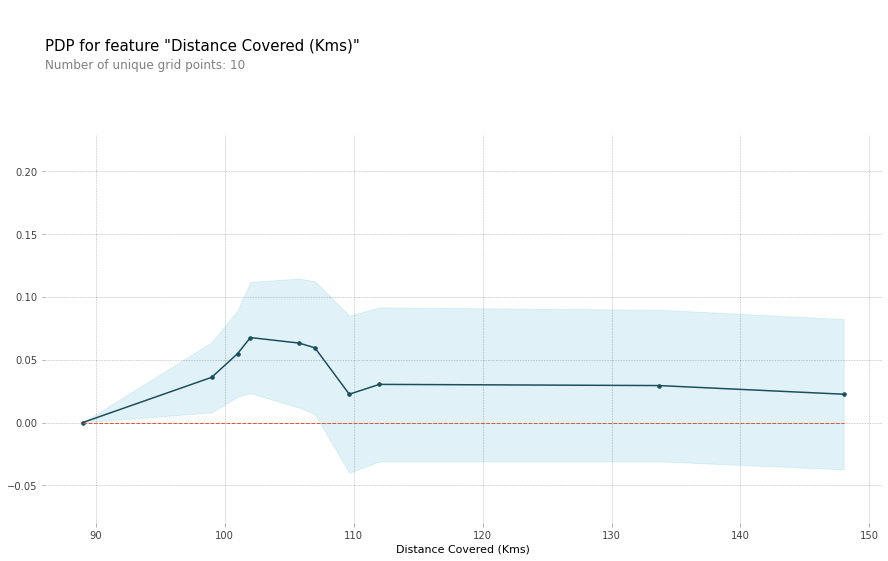

In [35]:
pdp.pdp_plot(pdp_dist,feature_to_plot)